In [ ]:
# Manejo de archivos y sistema operativo
import os  # Interacción con el sistema operativo (rutas, archivos, etc.)
import itertools  # Herramientas para crear combinaciones, permutaciones, etc.
from pathlib import Path  # Manejo de rutas de archivos de forma más robusta y orientada a objetos

# Manejo de datos
import numpy as np  # Computación numérica eficiente con arrays
import pandas as pd  # Manipulación y análisis de datos en estructuras tipo DataFrame
import polars as pl  # Alternativa a pandas, más rápida para grandes volúmenes de datos

# Clasificación de imágenes
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
%matplotlib inline

# Manejo de advertencias
import warnings  # Permite controlar las advertencias del sistema
warnings.filterwarnings("ignore")  # Suprime todas las advertencias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence

In [ ]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Leer CSV limpios

In [ ]:
BCN20000=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/BCN20000_categoriasfinales.csv')
Challenge2018=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2018_categoriasfinales.csv')
Challenge2024=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2024_categoriasfinalesNONEVO.csv')
Challenge2016_train=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2016_train_categoriasfinales.csv')
Challenge2016_test=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2016_test_categoriasfinales.csv')
HAM10000=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/HAM10000_categoriasfinales.csv')
Challenge2020_train=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2020_train_categoriasfinales.csv')
Challenge2020_test=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Challenge2020_test_categoriasfinales.csv')

In [ ]:
Challenge2024['diagnosis_3']
print('En Metadata:',Challenge2024['diagnosis_3'].unique())

En Metadata: ['Otras lesiones' 'Dermatosis cancerosa' 'Dermatosis precancerosa'
 'Tumores benignos']


###Concatenar todos los dataset

In [ ]:
# Creamos un diccionario con los nombres y sus columnas
metadata = {
    'BCN20000': set(BCN20000.columns),
    'Challenge2018': set(Challenge2018.columns),
    'Challenge2024': set(Challenge2024.columns),
    'Challenge2016_train': set(Challenge2016_train.columns),
    'Challenge2016_test': set(Challenge2016_test.columns),
    'HAM10000': set(HAM10000.columns),
    'Challenge2020_train': set(Challenge2020_train.columns),
    'Challenge2020_test': set(Challenge2020_test.columns)
}

# Columnas comunes entre todos
columnas_comunes = set.intersection(*metadata.values())
print("Columnas comunes entre todos:")
print(columnas_comunes)

# Columnas únicas por DataFrame
for nombre, columnas in metadata.items():
    unicas = columnas - columnas_comunes
    print(f"\n Columnas únicas en {nombre}:")
    print(unicas)

Columnas comunes entre todos:
{'diagnosis_2', 'sex', 'copyright_license', 'isic_id', 'age_approx', 'diagnosis_1', 'anatom_site_general', 'image_type', 'attribution', 'diagnosis_3', 'diagnosis_confirm_type', 'concomitant_biopsy'}

 Columnas únicas en BCN20000:
{'melanocytic', 'lesion_id', 'anatom_site_special'}

 Columnas únicas en Challenge2018:
{'melanocytic', 'lesion_id', 'anatom_site_special'}

 Columnas únicas en Challenge2024:
{'diagnosis_5', 'patient_id', 'mel_thick_mm', 'tbp_tile_type', 'clin_size_long_diam_mm', 'mel_mitotic_index', 'acquisition_day', 'diagnosis_4', 'lesion_id'}

 Columnas únicas en Challenge2016_train:
{'diagnosis_5', 'personal_hx_mm', 'melanocytic', 'clin_size_long_diam_mm', 'diagnosis_4', 'family_hx_mm', 'anatom_site_special'}

 Columnas únicas en Challenge2016_test:
{'diagnosis_5', 'personal_hx_mm', 'melanocytic', 'clin_size_long_diam_mm', 'diagnosis_4', 'family_hx_mm', 'anatom_site_special'}

 Columnas únicas en HAM10000:
{'image_manipulation', 'melanocytic

Dejamos solo las columnas que sean comunes entre todos los dataset así podemos concatenarlos

In [ ]:
eliminar_columnas_BCN20000 = ['melanocytic', 'lesion_id', 'anatom_site_special']
eliminar_columnas_Challenge2018 = ['melanocytic', 'lesion_id', 'anatom_site_special']
eliminar_columnas_Challenge2024 = ['diagnosis_5', 'patient_id', 'mel_thick_mm', 'tbp_tile_type', 'clin_size_long_diam_mm', 'mel_mitotic_index', 'acquisition_day', 'diagnosis_4', 'lesion_id']
eliminar_columnas_Challenge2016_train = ['diagnosis_5', 'personal_hx_mm', 'melanocytic', 'clin_size_long_diam_mm', 'diagnosis_4', 'family_hx_mm', 'anatom_site_special']
eliminar_columnas_Challenge2016_test = ['diagnosis_5', 'personal_hx_mm', 'melanocytic', 'clin_size_long_diam_mm', 'diagnosis_4', 'family_hx_mm', 'anatom_site_special']
eliminar_columnas_HAM10000 = ['image_manipulation', 'melanocytic', 'lesion_id', 'anatom_site_special']
eliminar_columnas_Challenge2020_train = ['fitzpatrick_skin_type', 'diagnosis_5', 'personal_hx_mm', 'patient_id', 'mel_ulcer', 'mel_thick_mm', 'melanocytic', 'clin_size_long_diam_mm', 'mel_mitotic_index', 'diagnosis_4', 'acquisition_day', 'family_hx_mm', 'dermoscopic_type', 'lesion_id', 'anatom_site_special']
eliminar_columnas_Challenge2020_test = ['fitzpatrick_skin_type', 'diagnosis_5', 'personal_hx_mm', 'patient_id', 'mel_ulcer', 'mel_thick_mm', 'melanocytic', 'clin_size_long_diam_mm', 'mel_mitotic_index', 'diagnosis_4', 'acquisition_day', 'family_hx_mm', 'dermoscopic_type', 'lesion_id', 'anatom_site_special']

# Eliminar las columnas del DataFrame
BCN20000.drop(columns=eliminar_columnas_BCN20000, inplace=True)
Challenge2018.drop(columns=eliminar_columnas_Challenge2018, inplace=True)
Challenge2024.drop(columns=eliminar_columnas_Challenge2024, inplace=True)
Challenge2016_train.drop(columns=eliminar_columnas_Challenge2016_train, inplace=True)
Challenge2016_test.drop(columns=eliminar_columnas_Challenge2016_test, inplace=True)
HAM10000.drop(columns=eliminar_columnas_HAM10000, inplace=True)
Challenge2020_train.drop(columns=eliminar_columnas_Challenge2020_train, inplace=True)
Challenge2020_test.drop(columns=eliminar_columnas_Challenge2020_test, inplace=True)

 # Verificar que las columnas han sido eliminadas
columnas_comunes = set.intersection(*metadata.values())
print("Columnas comunes entre todos:")
print(columnas_comunes)

Columnas comunes entre todos:
{'diagnosis_2', 'sex', 'copyright_license', 'isic_id', 'age_approx', 'diagnosis_1', 'anatom_site_general', 'image_type', 'attribution', 'diagnosis_3', 'diagnosis_confirm_type', 'concomitant_biopsy'}


In [ ]:
 # Verificar que las columnas han sido eliminadas
print("Columnas del DataFrame después de eliminar:")
print(Challenge2020_test.columns)
print(Challenge2020_test.shape)

Columnas del DataFrame después de eliminar:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'concomitant_biopsy', 'diagnosis_1',
       'diagnosis_2', 'diagnosis_3', 'diagnosis_confirm_type', 'image_type',
       'sex'],
      dtype='object')
(3540, 12)


Veamos la cantidad de datos por categoría en cada DataFrame

In [ ]:
metadatas = [                       # Lista de DataFrames
    ("BCN20000", BCN20000),
    ("Challenge2018", Challenge2018),
    ("Challenge2024", Challenge2024),
    ("Challenge2016_train", Challenge2016_train),
    ("Challenge2016_test", Challenge2016_test),
    ("HAM10000", HAM10000),
    ("Challenge2020_train", Challenge2020_train),
    ("Challenge2020_test", Challenge2020_test)
]

In [ ]:
# Crear un diccionario para guardar los conteos
conteos = {}

for name, df in metadatas:
    if 'diagnosis_3' in df.columns:  # Verifico que la columna exista
        conteos[name] = df['diagnosis_3'].value_counts()
    else:
        print(f" El dataframe {name} no tiene la columna 'diagnosis_3'")
        conteos[name] = pd.Series(dtype=int)

# Combinar los conteos en una sola tabla
tabla = pd.DataFrame(conteos).fillna(0).astype(int)

# Mostrar la tabla
print(tabla)

# Tabla transpuesta:
print("\n--- Tabla Transpuesta ---")
print(tabla.T)

                         BCN20000  Challenge2018  Challenge2024  \
diagnosis_3                                                       
Dermatosis cancerosa         8871           1824            393   
Dermatosis precancerosa      1088            130            114   
Nevo                         5647           6705              0   
Otras lesiones                597              0             36   
Tumores benignos             1436           1214             79   

                         Challenge2016_train  Challenge2016_test  HAM10000  \
diagnosis_3                                                                  
Dermatosis cancerosa                     173                  73      2156   
Dermatosis precancerosa                    4                   2       149   
Nevo                                     688                 284      7737   
Otras lesiones                            23                  16         0   
Tumores benignos                           1                  

In [ ]:
# # Sumar todas las columnas para obtener el total por categoría
totales = tabla.sum(axis=1)

# print("Totales por categoría de diagnosis_3:")
# print(totales)

# Ordenado de mayor a menor
totales_df = totales.reset_index()
totales_df.columns = ["diagnosis_3", "total"]
totales_df = totales_df.sort_values(by="total", ascending=False)

print("--- Totales ordenados ---")
print(totales_df)

--- Totales ordenados ---
               diagnosis_3  total
2                     Nevo  29350
0     Dermatosis cancerosa  14336
4         Tumores benignos   4436
1  Dermatosis precancerosa   1536
3           Otras lesiones    835


####Concatenación de los Datasets

In [ ]:
# Concatenar los 8 dataframes
metadata_concatenado = pd.concat([BCN20000, Challenge2018, Challenge2024, Challenge2016_train, Challenge2016_test, HAM10000, Challenge2020_train, Challenge2020_test ], ignore_index=True)

# Verificamos el resultado
print(f"Filas totales: {metadata_concatenado.shape[0]}")
print(f"Columnas: {metadata_concatenado.shape[1]}")
print(metadata_concatenado['diagnosis_3'].value_counts())

Filas totales: 50493
Columnas: 12
diagnosis_3
Nevo                       29350
Dermatosis cancerosa       14336
Tumores benignos            4436
Dermatosis precancerosa     1536
Otras lesiones               835
Name: count, dtype: int64


In [ ]:
ruta_destino='/content/drive/MyDrive/Metadatos/CSVs limpios'
metadata_concatenado.to_csv(os.path.join(ruta_destino, 'Metadata_concatenado.csv'), index=False)

##Eliminar las fotos que no están en el dataset final

In [ ]:
print('En Metadata:',Challenge2024['diagnosis_3'].value_counts())  #Contar cuántos hay de cada clase

En Metadata: diagnosis_3
Nevo                       443
Dermatosis cancerosa       393
Dermatosis precancerosa    114
Tumores benignos            79
Otras lesiones              36
Name: count, dtype: int64


### BCN20000

In [ ]:
imagenes = ['/content/drive/MyDrive/Dateset/bcn20000']
ids_validos = set(BCN20000['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072256.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072281.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072274.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072300.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072303.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072321.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072341.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072350.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072338.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072332.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072366.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072419.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072425.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn20000/ISIC_0072438.jpg
Eliminado: /content/drive/MyDrive/Dateset/bcn200

In [ ]:
imagenes='/content/drive/MyDrive/Dateset/bcn20000'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 17636


###Challenge2018

In [ ]:
imagenes1 = ['/content/drive/MyDrive/Dateset/Challenge 2018 Task 3 Training']
ids_validos = set(Challenge2018['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes1:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

In [ ]:
imagenes1='/content/drive/MyDrive/Dateset/Challenge 2018 Task 3 Training'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes1) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 9859


Faltan 14 imágenes, veamos cuales son

In [ ]:
# Lista de IDs en el dataframe (los que deberías tener)
ids_validos = set(Challenge2018['isic_id'].astype(str).tolist())

# Lista de imágenes en la carpeta (sin extensión)
ids_en_carpeta = {os.path.splitext(archivo)[0] for archivo in os.listdir(imagenes1) if archivo.lower().endswith('.jpg')}

# Diferencia: los que están en ids_validos pero no en la carpeta
faltantes = ids_validos - ids_en_carpeta

print(f"Cantidad faltante: {len(faltantes)}")
print("IDs faltantes:", faltantes)

Cantidad faltante: 14
IDs faltantes: {'ISIC_0033263', 'ISIC_0033261', 'ISIC_0033268', 'ISIC_0033267', 'ISIC_0033266', 'ISIC_0033259', 'ISIC_0033260', 'ISIC_0033265', 'ISIC_0033262', 'ISIC_0033162', 'ISIC_0033264', 'ISIC_0033161', 'ISIC_0033160', 'ISIC_0033258'}


Resolución: busque cada una de las que falta en la página del ISIC, las descargué y las subí a la carpeta, luego compruebo que sí estan

In [ ]:
# Lista de IDs en el dataframe (los que deberías tener)
ids_validos = set(Challenge2018['isic_id'].astype(str).tolist())

# Lista de imágenes en la carpeta (sin extensión)
ids_en_carpeta = {os.path.splitext(archivo)[0] for archivo in os.listdir(imagenes1) if archivo.lower().endswith('.jpg')}

# Diferencia: los que están en ids_validos pero no en la carpeta
faltantes = ids_validos - ids_en_carpeta

print(f"Cantidad faltante: {len(faltantes)}")
print("IDs faltantes:", faltantes)

Cantidad faltante: 0
IDs faltantes: set()


In [ ]:
imagenes1='/content/drive/MyDrive/Dateset/Challenge 2018 Task 3 Training'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes1) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 9873


###Challenge2016 test

In [ ]:
imagenes2 = ['/content/drive/MyDrive/Dateset/Challenge 2016 test']
ids_validos = set(Challenge2016_test['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes2:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 test/ISIC_0000257.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 test/ISIC_0000246.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 test/ISIC_0010377.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 test/ISIC_0011325.jpg


In [ ]:
imagenes2='/content/drive/MyDrive/Dateset/Challenge 2016 test'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes2) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 375


###Challenge2016 train

In [ ]:
imagenes3 = ['/content/drive/MyDrive/Dateset/Challenge 2016 training']
ids_validos = set(Challenge2016_train['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes3:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0000454.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0009893.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010091.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010068.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010001.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010230.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010218.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010323.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010266.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010242.jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2016 training/ISIC_0010438.jpg


In [ ]:
imagenes3 = '/content/drive/MyDrive/Dateset/Challenge 2016 training'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes3) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 889


###HAM10000

In [ ]:
imagenes4 = ['/content/drive/MyDrive/Dateset/HAM10000']
ids_validos = set(HAM10000['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes4:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

In [ ]:
imagenes4 = '/content/drive/MyDrive/Dateset/HAM10000'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes4) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 11540


###Challenge2020 test


In [ ]:
# imagenes6 = ['']
# ids_validos = set(Challenge2020_test['isic_id'].astype(str).tolist())
# extensiones_validas = ('.jpg', '.jpeg', '.png')

# for carpeta in imagenes6:
#     for archivo in os.listdir(carpeta):
#         nombre_sin_ext = os.path.splitext(archivo)[0]
#         if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
#             ruta_completa = os.path.join(carpeta, archivo)
#             os.remove(ruta_completa)
#             print(f"Eliminado: {ruta_completa}")

In [ ]:
# imagenes6 = '/content/drive/MyDrive/Dateset/Challenge 2020 Test'
# # Contar solo archivos .jpg
# im = [archivo for archivo in os.listdir(imagenes6) if archivo.lower().endswith('.jpg')]
# print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 3540


Lo hice en Jupyter - cargue directamente la carpeta con las imágenes que si --- es un 100/100 recomiendo

####Código para Jupyter

In [ ]:
# import os
# import pandas as pd

# # Ruta -- carpeta donde están las imágenes en la PC
# imagenes4 = r"C:\Users\Lucia\Documents\Datasets\HAM10000"

# # Archivo CSV con los IDs válidos
# HAM10000 = pd.read_csv(r"C:\Users\Lucia\Documents\Datasets\HAM10000_metadata.csv")

# # Sacamos los ids válidos del dataframe
# ids_validos = set(HAM10000['isic_id'].astype(str).tolist())

# # Extensiones válidas
# extensiones_validas = ('.jpg', '.jpeg', '.png')

# # Borrar imágenes que no estén en el dataset
# for archivo in os.listdir(imagenes4):
#     nombre_sin_ext = os.path.splitext(archivo)[0]
#     if archivo.lower().endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
#         ruta_completa = os.path.join(imagenes4, archivo)
#         os.remove(ruta_completa)
#         print(f"Eliminado: {ruta_completa}")

# # Contar imágenes finales
# im = [archivo for archivo in os.listdir(imagenes4) if archivo.lower().endswith('.jpg')]
# print(f"Cantidad de imágenes en la carpeta: {len(im)}")

###Challenge2020 train

In [ ]:
# imagenes5 = ['']
# ids_validos = set(Challenge2020_train['isic_id'].astype(str).tolist())
# extensiones_validas = ('.jpg', '.jpeg', '.png')

# for carpeta in imagenes5:
#     for archivo in os.listdir(carpeta):
#         nombre_sin_ext = os.path.splitext(archivo)[0]
#         if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
#             ruta_completa = os.path.join(carpeta, archivo)
#             os.remove(ruta_completa)
#             print(f"Eliminado: {ruta_completa}")

In [ ]:
imagenes5 = '/content/drive/MyDrive/Dateset/Challenge 2020 Train'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes5) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 6015


###Challenge2024

In [ ]:
imagenes7 = ['/content/drive/MyDrive/Dateset/Challenge 2024']
ids_validos = set(Challenge2024['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes7:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

Eliminado: /content/drive/MyDrive/Dateset/Challenge 2024/ISIC_6451461 (1).jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2024/ISIC_7665681 (1).jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2024/ISIC_8326053 (1).jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2024/ISIC_2288382 (1).jpg
Eliminado: /content/drive/MyDrive/Dateset/Challenge 2024/ISIC_6798815 (1).jpg


In [ ]:
imagenes7 = '/content/drive/MyDrive/Dateset/Challenge 2024'
# Contar solo archivos .jpg
im = [archivo for archivo in os.listdir(imagenes7) if archivo.lower().endswith('.jpg')]
print(f"Cantidad de imágenes en la carpeta: {len(im)}")

Cantidad de imágenes en la carpeta: 622


In [ ]:
# Lista de IDs en el dataframe (los que deberías tener)
ids_validos = set(Challenge2024['isic_id'].astype(str).tolist())

# Lista de imágenes en la carpeta (sin extensión)
ids_en_carpeta = {os.path.splitext(archivo)[0] for archivo in os.listdir(imagenes7) if archivo.lower().endswith('.jpg')}

# Diferencia: los que están en ids_validos pero no en la carpeta
faltantes = ids_validos - ids_en_carpeta

print(f"Cantidad faltante: {len(faltantes)}")
print("IDs faltantes:", faltantes)

Cantidad faltante: 0
IDs faltantes: set()


##Creación de carpetas

In [ ]:
import os
import shutil
from tqdm import tqdm

In [ ]:
metadata=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Metadata_concatenado.csv')
print('En Metadata:',metadata['diagnosis_3'].value_counts())  #Contar cuántos hay de cada clase
print(metadata.shape)

En Metadata: diagnosis_3
Nevo                       29350
Dermatosis cancerosa       14336
Tumores benignos            4436
Dermatosis precancerosa     1536
Otras lesiones               835
Name: count, dtype: int64
(50493, 12)


In [ ]:
# Carpeta destino general
carpeta_clasificado = '/content/drive/MyDrive/Dateset/Clasificado'

In [ ]:
#Rutas originales de las imágenes
carpeta_base_imagenes = {
    'BCN20000': '/content/drive/MyDrive/Dateset/bcn20000',
    'Challenge2018': '/content/drive/MyDrive/Dateset/Challenge 2018 Task 3 Training',
    'Challenge2024': '/content/drive/MyDrive/Dateset/Challenge 2024',
    'Challenge2016_train': '/content/drive/MyDrive/Dateset/Challenge 2016 training',
    'Challenge2016_test': '/content/drive/MyDrive/Dateset/Challenge 2016 test',
    'HAM10000': '/content/drive/MyDrive/Dateset/HAM10000',
    'Challenge2020_train': '/content/drive/MyDrive/Dateset/Challenge 2020 Train',
    'Challenge2020_test': '/content/drive/MyDrive/Dateset/Challenge 2020 Test'
}

In [ ]:
for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
    categoria = str(row['diagnosis_3'])
    nombre_base = str(row['isic_id'])

    # Buscar imagen en todas las carpetas originales
    encontrada = False
    for carpeta_origen in carpeta_base_imagenes.values():
        for ext in ['.jpg', '.jpeg', '.png']:
            ruta_imagen = os.path.join(carpeta_origen, nombre_base + ext)
            if os.path.exists(ruta_imagen):
                encontrada = True
                extension = ext
                break
        if encontrada:
            break

    if not encontrada:
        continue  # ya fue movida o no existe

    # Carpeta destino
    carpeta_destino = os.path.join(carpeta_clasificado, categoria)
    os.makedirs(carpeta_destino, exist_ok=True)

    # Nombre destino: mantener nombre original, pero verificar si ya existe
    ruta_destino = os.path.join(carpeta_destino, nombre_base + extension)
    contador = 1
    while os.path.exists(ruta_destino):
        ruta_destino = os.path.join(carpeta_destino, f"{nombre_base}_{contador}{extension}")
        contador += 1

    # Mover la imagen
    shutil.move(ruta_imagen, ruta_destino)

100%|██████████| 50493/50493 [02:49<00:00, 298.47it/s]


In [ ]:
# carpeta_base_imagenes
def contar_imagenes(carpeta):
    conteo = {}
    for root, dirs, files in os.walk(carpeta):
        for d in dirs:
            ruta_subcarpeta = os.path.join(root, d)
            # contar solo archivos de imagen
            num_imgs = len([f for f in os.listdir(ruta_subcarpeta) if f.lower().endswith(('.jpg','.jpeg','.png'))])
            conteo[ruta_subcarpeta] = num_imgs
    return conteo

# Contar imágenes en carpetas originales
print("=== Carpetas originales ===")
for nombre, ruta in carpeta_base_imagenes.items():
    num_imgs = len([f for f in os.listdir(ruta) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    print(f"{nombre}: {num_imgs} imágenes restantes")

=== Carpetas originales ===
BCN20000: 0 imágenes restantes
Challenge2018: 0 imágenes restantes
Challenge2024: 0 imágenes restantes
Challenge2016_train: 0 imágenes restantes
Challenge2016_test: 0 imágenes restantes
HAM10000: 0 imágenes restantes
Challenge2020_train: 0 imágenes restantes
Challenge2020_test: 0 imágenes restantes


In [ ]:
# Contar imágenes en la carpeta Clasificado
print("\n=== Carpeta Clasificado ===")
conteo_clasificado = contar_imagenes(carpeta_clasificado)
for ruta, num in conteo_clasificado.items():
    print(f"{os.path.basename(ruta)}: {num} imágenes")


=== Carpeta Clasificado ===
Nevo: 22645 imágenes
Dermatosis cancerosa: 12512 imágenes
Otras lesiones: 835 imágenes
Tumores benignos: 3222 imágenes
Dermatosis precancerosa: 1406 imágenes


### La cantidad de imágenes es menor a las filas del dataset

In [ ]:
import pandas as pd

# Ver total de filas
total_filas = len(metadata)

# Ver duplicados en la columna de ID de imagen
columna_imagen = 'isic_id'
total_unicos = metadata[columna_imagen].nunique()
duplicados = total_filas - total_unicos

print(f"Filas totales en metadata: {total_filas}")
print(f"IDs únicos de imágenes: {total_unicos}")
print(f"Filas duplicadas (mismo ID repetido): {duplicados}")

📊 Filas totales en metadata: 50493
🖼️ IDs únicos de imágenes: 40620
🔁 Filas duplicadas (mismo ID repetido): 9873


In [ ]:
# Cargar el metadata
metadata = pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Metadata_concatenado.csv')

print("Filas originales:", len(metadata))

# Eliminar duplicados manteniendo la primera ocurrencia
metadata_sin_duplicados = metadata.drop_duplicates(subset=['isic_id'], keep='first')

print("Filas después de eliminar duplicados:", len(metadata_sin_duplicados))
print("Filas eliminadas:", len(metadata) - len(metadata_sin_duplicados))

# Guardar el CSV limpio
metadata_sin_duplicados.to_csv('/content/drive/MyDrive/Metadatos/Metadata_sin_duplicados.csv', index=False)
print("Guardado en: /content/drive/MyDrive/Metadatos/Metadata_sin_duplicados.csv")

📊 Filas originales: 50493
✅ Filas después de eliminar duplicados: 40620
🗑️ Filas eliminadas: 9873
Guardado en: /content/drive/MyDrive/Metadatos/Metadata_sin_duplicados.csv


In [ ]:
metadata_sin_duplicados= pd.read_csv('/content/drive/MyDrive/Metadatos/Metadata_sin_duplicados.csv')
carpeta_clasificado = '/content/drive/MyDrive/Dateset/Clasificado'

columna_imagen = 'isic_id'

# Extensiones válidas
extensiones = ('.jpg', '.jpeg', '.png')

# Lista de imágenes en dataset
metadata_imgs = set(metadata_sin_duplicados[columna_imagen].astype(str).tolist())

# Lista de imágenes en carpeta
imagenes_en_carpeta = set()

for root, _, files in os.walk(carpeta_clasificado):
    for f in files:
        if f.lower().endswith(extensiones):
            nombre = os.path.splitext(f)[0]  # sin extensión
            imagenes_en_carpeta.add(nombre)

# Comparación
faltantes = metadata_imgs - imagenes_en_carpeta

print(f"Total en metadata: {len(metadata_imgs)}")
print(f"Total en carpeta Clasificado: {len(imagenes_en_carpeta)}")
print(f"Total de imágenes faltantes: {len(faltantes)}")

✅ Total en metadata: 40620
📂 Total en carpeta Clasificado: 40620
❌ Total de imágenes faltantes: 0


## Hay muchas imágenes de NEVO con respecto a las otras, voy a hacer una copia y un datasaet nuevo con solo los primeros 12.600 nevos y eliminar todos los demás. Para ver si tarda menos en compilar

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Metadata_sin_duplicados.csv')

In [ ]:
dataset.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_confirm_type,image_type,sex
0,ISIC_0053453,Hospital Clínic de Barcelona,CC-BY-NC,60.0,anterior torso,True,Benign,Benign melanocytic proliferations,Nevo,histopathology,dermoscopic,male
1,ISIC_0053454,Hospital Clínic de Barcelona,CC-BY-NC,55.0,anterior torso,True,Malignant,Malignant melanocytic proliferations (Melanoma),Dermatosis cancerosa,histopathology,dermoscopic,male
2,ISIC_0053456,Hospital Clínic de Barcelona,CC-BY-NC,50.0,anterior torso,True,Malignant,Malignant melanocytic proliferations (Melanoma),Dermatosis cancerosa,histopathology,dermoscopic,female
3,ISIC_0053457,Hospital Clínic de Barcelona,CC-BY-NC,85.0,head/neck,True,Malignant,Malignant epidermal proliferations,Dermatosis cancerosa,histopathology,dermoscopic,male
4,ISIC_0053458,Hospital Clínic de Barcelona,CC-BY-NC,35.0,head/neck,True,Benign,Benign melanocytic proliferations,Nevo,histopathology,dermoscopic,male


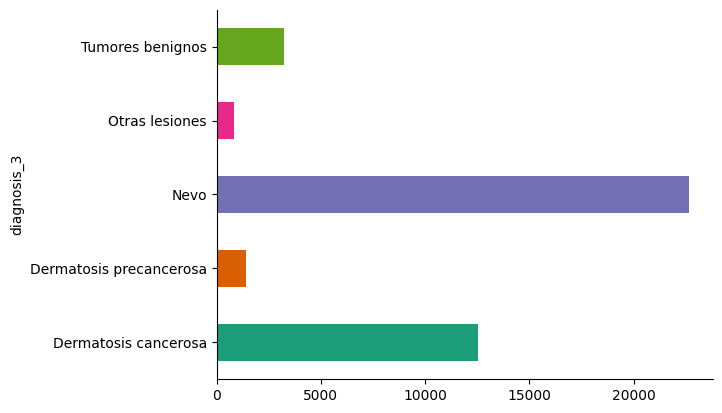

In [ ]:
# @title diagnosis_3

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('diagnosis_3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print('En Dataset:',dataset['diagnosis_3'].value_counts())  #Contar cuántos hay de cada clase
print(dataset.shape)

En Dataset: diagnosis_3
Nevo                       22645
Dermatosis cancerosa       12512
Tumores benignos            3222
Dermatosis precancerosa     1406
Otras lesiones               835
Name: count, dtype: int64
(40620, 12)


In [ ]:
# Filtrar las filas que son Nevo
nevo = dataset[dataset["diagnosis_3"] == "Nevo"]

# Tomar solo 12600 de esas filas
nevo_sample = nevo.sample(n=12600, random_state=42)

# Seguir igual con el resto de clases
otras_clases = dataset[dataset["diagnosis_3"] != "Nevo"]

# Unir todo en un nuevo dataset
dataset_final = pd.concat([nevo_sample, otras_clases], axis=0)

print(dataset_final["diagnosis_3"].value_counts())
print(dataset_final.shape)

diagnosis_3
Nevo                       12600
Dermatosis cancerosa       12512
Tumores benignos            3222
Dermatosis precancerosa     1406
Otras lesiones               835
Name: count, dtype: int64
(30575, 12)


In [ ]:
dataset_final.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_confirm_type,image_type,sex
37942,ISIC_2548780,"Department of Dermatology, University of Athen...",CC-BY,25.0,upper extremity,False,Benign,Benign melanocytic proliferations,Nevo,single image expert consensus,dermoscopic,female
16116,ISIC_0071531,Hospital Clínic de Barcelona,CC-BY-NC,55.0,lower extremity,True,Benign,Benign melanocytic proliferations,Nevo,histopathology,dermoscopic,female
38460,ISIC_3955981,"Department of Dermatology, University of Athen...",CC-BY,50.0,posterior torso,False,Benign,Benign melanocytic proliferations,Nevo,single image expert consensus,dermoscopic,male
32546,ISIC_2528656,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,60.0,NaN,False,Benign,Benign melanocytic proliferations,Nevo,serial imaging showing no change,dermoscopic,male
28160,ISIC_0000039,Anonymous,CC-0,60.0,posterior torso,False,Benign,Benign melanocytic proliferations,Nevo,NaN,dermoscopic,female


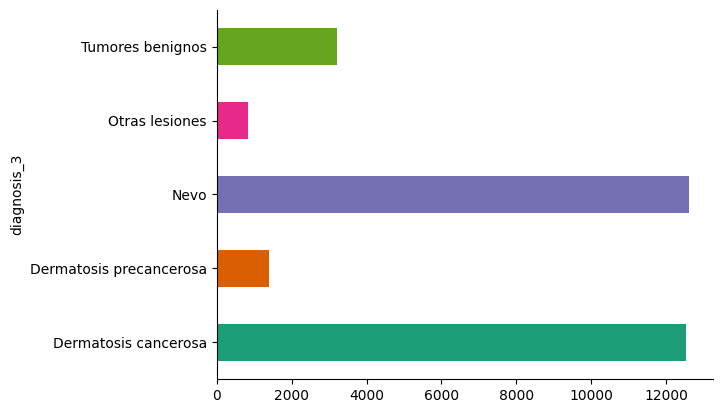

In [ ]:
# @title diagnosis_3

from matplotlib import pyplot as plt
import seaborn as sns
dataset_final.groupby('diagnosis_3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Guardar el nuevo dataset
dataset_final.to_csv('/content/drive/MyDrive/Metadatos/CSVs limpios/Metadata_menosNEVOS.csv', index=False)

### Cantidad de imágenes en la carpeta original vs la copiada que hice

In [ ]:
import os

ruta = "/content/drive/MyDrive/Dateset/Clasificado"

# Diccionario para guardar las cantidades
conteo = {}

# Recorrer cada subcarpeta
for carpeta in os.listdir(ruta):
    subcarpeta = os.path.join(ruta, carpeta)
    if os.path.isdir(subcarpeta):
        # Contar solo archivos (ej. imágenes)
        n = len([f for f in os.listdir(subcarpeta) if os.path.isfile(os.path.join(subcarpeta, f))])
        conteo[carpeta] = n

# Mostrar resultados
for clase, cantidad in conteo.items():
    print(f"{clase}: {cantidad}")

print("\nTotal de imágenes:", sum(conteo.values()))

Dermatosis precancerosa: 1406
Nevo: 22645
Dermatosis cancerosa: 12512
Otras lesiones: 835
Tumores benignos: 3222

Total de imágenes: 40620


In [ ]:
ruta = "/content/drive/MyDrive/Dateset/Clasificado_menosNEVOS"

# Diccionario para guardar las cantidades
conteo = {}

# Recorrer cada subcarpeta
for carpeta in os.listdir(ruta):
    subcarpeta = os.path.join(ruta, carpeta)
    if os.path.isdir(subcarpeta):
        # Contar solo archivos (ej. imágenes)
        n = len([f for f in os.listdir(subcarpeta) if os.path.isfile(os.path.join(subcarpeta, f))])
        conteo[carpeta] = n

# Mostrar resultados
for clase, cantidad in conteo.items():
    print(f"{clase}: {cantidad}")

print("\nTotal de imágenes:", sum(conteo.values()))

Tumores benignos: 3222
Dermatosis precancerosa: 1406
Dermatosis cancerosa: 12512
Otras lesiones: 835
Nevo: 12600

Total de imágenes: 30575


In [ ]:
imagenes = ['/content/drive/MyDrive/Dateset/Clasificado_menosNEVOS/Nevo']
ids_validos = set(dataset_final['isic_id'].astype(str).tolist())
extensiones_validas = ('.jpg', '.jpeg', '.png')

for carpeta in imagenes:
    for archivo in os.listdir(carpeta):
        nombre_sin_ext = os.path.splitext(archivo)[0]
        if archivo.endswith(extensiones_validas) and nombre_sin_ext not in ids_validos:
            ruta_completa = os.path.join(carpeta, archivo)
            os.remove(ruta_completa)
            print(f"Eliminado: {ruta_completa}")

In [ ]:
# Contar cuántas imágenes quedaron en Nevo
restantes = len([f for f in os.listdir(imagenes[0]) if f.endswith(extensiones_validas)])
print(f"\nImágenes restantes en Nevo: {restantes}")


Imágenes restantes en Nevo: 12600
